In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("wine_fraud.csv")

In [3]:
print(df.info)

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [37]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

## DATA VISUALIZATION

<AxesSubplot:xlabel='quality', ylabel='count'>

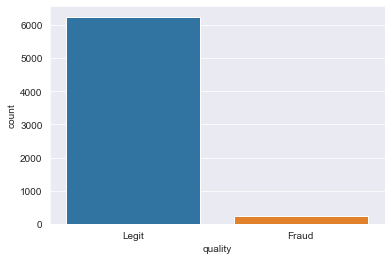

In [6]:
sns.countplot(x='quality',data=df)

**Let's find out if there is a difference between red and white wine when it comes to fraud**

<AxesSubplot:xlabel='type', ylabel='count'>

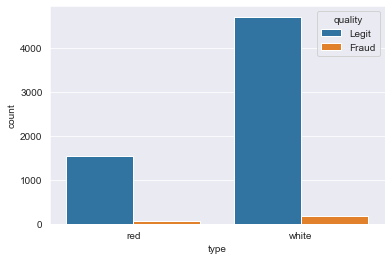

In [7]:
sns.countplot(x = 'type', hue = 'quality', data = df)

**What percentage of red wines are Fraud? What percentage of white wines are fraud?**

In [8]:
red = df[df['type']=='red']
white = df[df['type']== 'white']

In [9]:
print('Percentage of fraud in red wines')
print(100*(len(red[red['quality']=='Fraud'])/len(red)))

Percentage of fraud in red wines
3.9399624765478425


In [10]:
print('Percentage of fraud in white wines')
print(100*(len(white[white['quality']=='Fraud'])/len(white)))

Percentage of fraud in white wines
3.7362188648427925


**We will Calculate the correlation between the various features and the "quality" column. To do this we will map the column to 0 and 1 instead of a string.**

In [11]:
df['Fraud']= df['quality'].map({'Legit':0,'Fraud':1})

In [25]:
df.corr()['Fraud'].sort_values()

free sulfur dioxide    -0.085204
citric acid            -0.061789
alcohol                -0.051141
residual sugar         -0.048756
total sulfur dioxide   -0.035252
sulphates              -0.034046
density                 0.016351
pH                      0.020107
fixed acidity           0.021794
chlorides               0.034499
volatile acidity        0.151228
Fraud                   1.000000
Name: Fraud, dtype: float64

<AxesSubplot:>

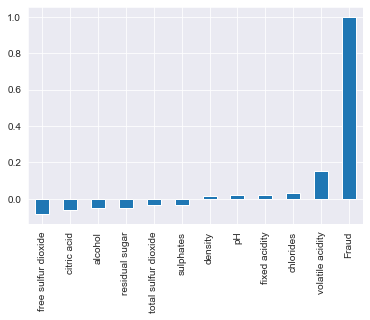

In [26]:
df.corr()['Fraud'].sort_values().plot(kind='bar')

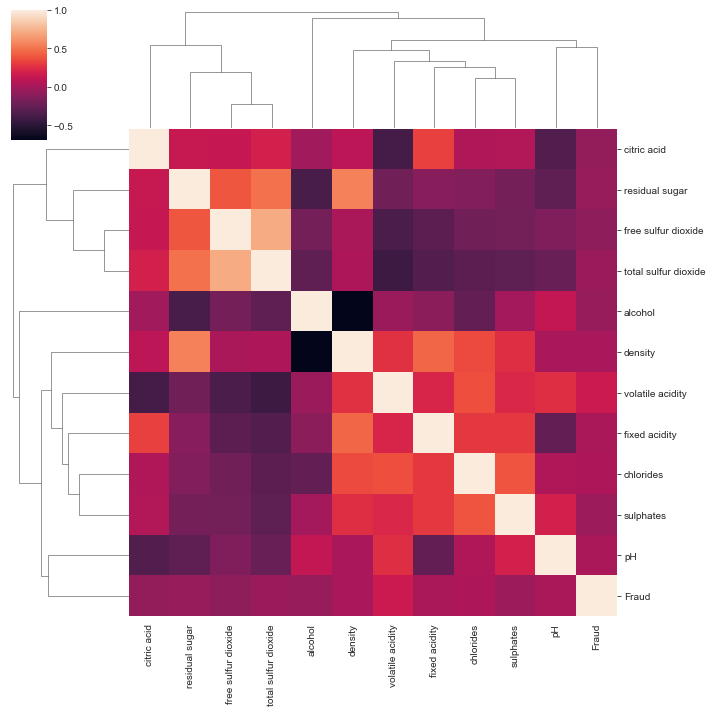

In [28]:
sns.clustermap(df.corr())


## Machine Learning Model
**Convert the categorical column "type" from a string or "red" or "white" to dummy variables:**



In [38]:
df['type'] = pd.get_dummies(df['type'],drop_first=True)

In [ ]:
df = df.drop('Fraud',axis=1)

In [39]:
X = df.drop('quality',axis=1)
y = df['quality']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

In [44]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [45]:
from sklearn.svm import SVC

In [46]:
svc = SVC()

**GridSearchCV to run a grid search for the best C and gamma parameters.**

In [47]:
from sklearn.model_selection import GridSearchCV

In [56]:
param_grid = { 'C':[0.001,0.01,0.1,0.5,1],'gamma':['scale','auto']}
grid = GridSearchCV(svc,param_grid)

In [57]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [60]:
grid.best_params_

{'C': 1, 'gamma': 'scale'}

In [61]:
from sklearn.metrics import classification_report